1. 随机森林中的每课树都是独立的.

- 提升算法:
    1. Adaboost  
    2. GBDT->XGBoost->LightGBM->CatBoost

## 何为Boosting

分类问题中,通过改变训练样本的权重,学习多个分类器,并且将这些分类器信息线性组合,从而提高分类的性能.

如何提升呢?有不同的提升方法,其中比较有代表性的一个是AdaBoost还有一个是梯度提升树(GBDT)

## Boostin基本成员之Adaboost

1. 初始化样本的权重: 给定一个训练数据集,初始化每个样本的权重,通常每个样本初始的权重是想等的.
2. 迭代训练若分类器: 对于每一轮的迭代,使用当前样本的权重的分布来训练员个弱分类器,并且计算这个分类器分类的误差率
3. 更新样本的权重: 根据当前若分类器的表现更新样本权重,错误的分类样本的权重会增加,而正确分类样本的权重会减少
4. 组合弱分类器,将所有的训练所得的弱分类器按照它们的权重组合起来,形成一个强分类器
5. 终止条件:达到预定的迭代次数或者性能不在提升到时候就会停止迭代.

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sys
print('Python version:', sys.version)
print('Pandas version:', pd.__version__)
print('Numpy version:', np.__version__)
print('Matplotlib version:', matplotlib.__version__)

Python version: 3.12.3 | packaged by conda-forge | (main, Apr 15 2024, 18:20:11) [MSC v.1938 64 bit (AMD64)]
Pandas version: 2.2.2
Numpy version: 1.26.4
Matplotlib version: 3.8.4


In [9]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [6]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1210)

In [10]:
model = AdaBoostClassifier(n_estimators=50, algorithm='SAMME')
model.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME')

In [13]:
y_pred = model.predict(X_test)
print(f"y_real={y_test}")
print(f"y_pred={y_pred}")
cnt = np.sum(y_test == y_pred)
accuracy= 100 * cnt / len(y_test)
print(f"模型的准确率为: {accuracy: .2f}%")

y_real=[0 1 1 1 0 1 2 2 1 0 2 0 1 1 0 1 0 0 1 1 0 2 0 0 1 2 2 2 1 0]
y_pred=[0 1 1 1 0 1 2 2 1 0 1 0 1 1 0 1 0 0 1 1 0 2 0 0 1 2 2 2 1 0]
模型的准确率为:  96.67%


In [53]:
# 打印f1分类报告
from sklearn.metrics import classification_report
from rich import print
print(classification_report(y_test, y_pred))

precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.92      1.00      0.96        12
           2       1.00      0.86      0.92         7

    accuracy                           0.97        30
   macro avg       0.97      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30

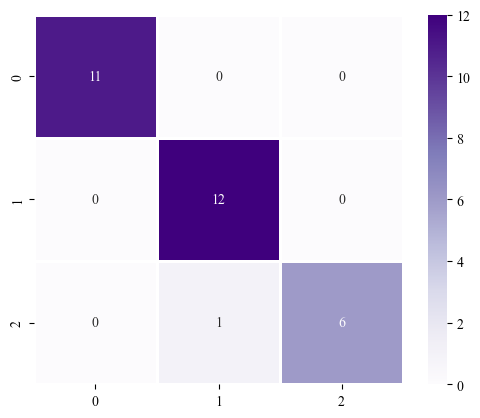

In [60]:
# 混淆矩阵的可视化
from sklearn.metrics import confusion_matrix
import seaborn as sns
corr = confusion_matrix(y_pred=y_pred, y_true=y_test)
sns.heatmap(corr, annot=True, cmap='Purples',square=True, edgecolor='cyan',linewidths=1,)
plt.show()

In [54]:
# 查看准确率
from sklearn.metrics import accuracy_score
accuracy_score(y_true=y_test, y_pred=y_pred)

0.9666666666666667

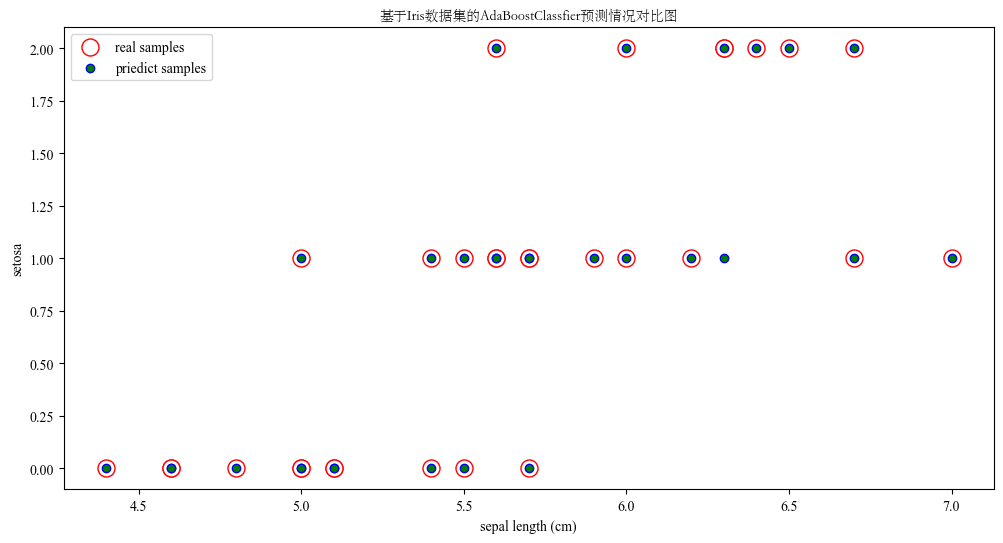

In [63]:
plt.rcParams['font.sans-serif'] = 'Times New Roman'

plt.figure(figsize=(12,6), dpi=100)

plt.scatter(X_test[:,0],y_test, c='white',label='real samples',marker='o',s=150,
           edgecolors='red'
           )
plt.scatter(X_test[:,0], y_pred, c='green', marker='o', edgecolors='blue',
           label='priedict samples'
           )

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.target_names[0] or {iris.target_names[1]})
plt.title('基于Iris数据集的AdaBoostClassfier预测情况对比图',fontproperties='STsong')
plt.legend()
plt.show()

In [61]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
accuracy_score(y_pred=dtc.predict(X_test),y_true=y_test)

0.9

In [62]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc .fit(X_train,y_train)
accuracy_score(y_pred=rfc.predict(X_test),y_true=y_test)

0.9333333333333333

### Adaboost模型参数

class AdaBoostClassifier(sklearn.utils._metadata_requests._RoutingNotSupportedMixin, sklearn.base.ClassifierMixin, BaseWeightBoosting)
 |  AdaBoostClassifier(estimator=None, *, n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=None)
 
 
1. estimator: 基学习器,默认使用的DecisionTreeClassifier
2. n_estimators: 提升过程中使用的最大估计器数量,如果模型完美拟合数据,则提前终止学习过程,值必须在1到inf之间
3. learning_rate=1.0:提升迭代中每个分类器的权重,较高的学习率会增加每个分类器(基学习器)的贡献,
4. algorithm='SAMME.R': 使用的学习算法,{'SAMME", "SAMME.R"}
    - SAMME.R使用的SAMNME.R实数提升算法,这里estimator必须支持计算类别概率,目前在新版本被移除了
    - SAMME: SAMME离散提升算法,
5. random_stat: 随机种子.

In [65]:
model

AdaBoostClassifier(algorithm='SAMME')

### 模型属性}

In [77]:
model.estimator_ # 使用的基学习器
model.estimators_  # 基学习器列表
model.classes_ # 类别标签.
model.n_classes_ # 类别标签的数量
model.estimator_weights_ # 每个基学习器的权重
model.estimator_errors_ # 每个基学习器的分类误差
model.feature_importances_  # 比较重要的特征
model.n_features_in_  #  在fit当中使用的特征数量

4

## AdaBoostRegressor回归任务

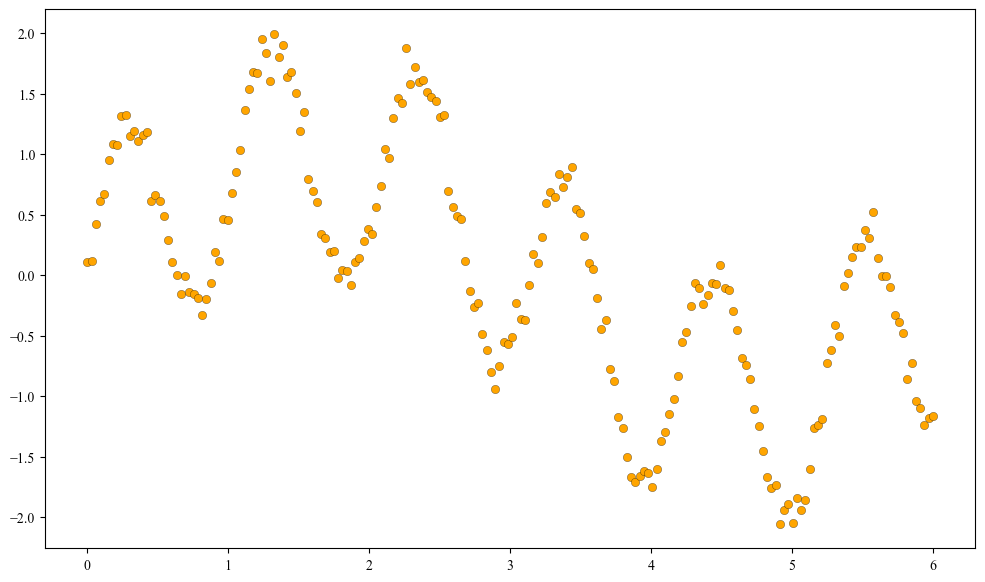

In [88]:
from sklearn.ensemble import AdaBoostRegressor 

rng = np.random.RandomState(1210)
X = np.linspace(0,6,200)[:,np.newaxis]
y = np.sin(X).ravel() + np.sin(6*X).ravel() + rng.normal(0,0.1, X.shape[0])
plt.figure(figsize=(12,7), dpi=100)
plt.scatter(X, y, color='orange',edgecolors='black',linewidths=0.2)

In [89]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

In [95]:
dtr = DecisionTreeRegressor(max_depth=4) # 回归树
abr = AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=4),
                       n_estimators=300, random_state=1210
                       ) # adaboost回归
dtr.fit(X, y)
abr.fit(X, y)

dtr_predict = dtr.predict(X)
abr_predict = abr.predict(X)

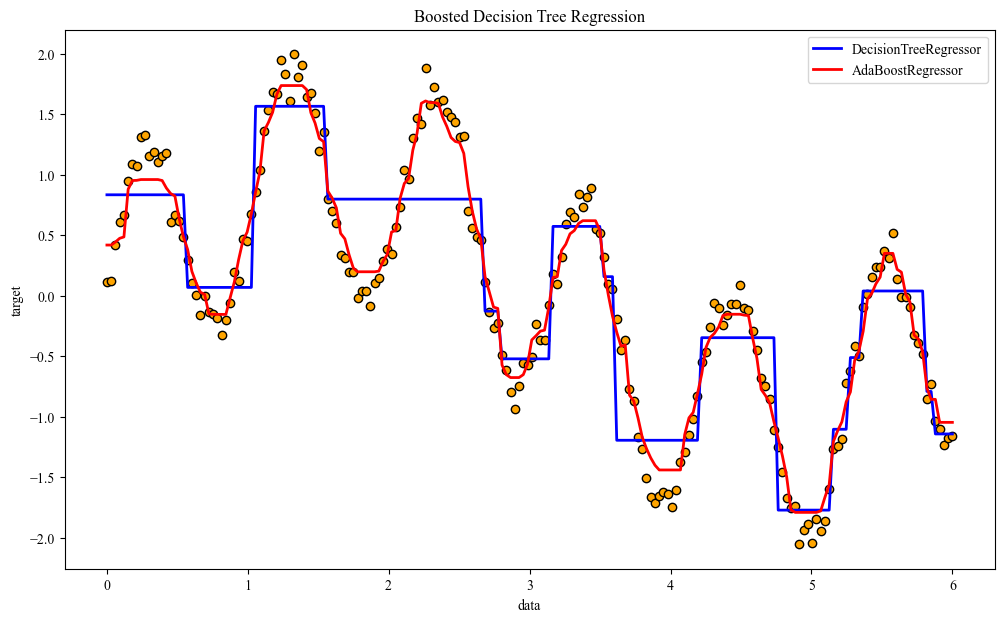

In [103]:
from sklearn.ensemble import AdaBoostRegressor 

rng = np.random.RandomState(1210)
X = np.linspace(0,6,200)[:,np.newaxis]
y = np.sin(X).ravel() + np.sin(6*X).ravel() + rng.normal(0,0.1, X.shape[0])
plt.figure(figsize=(12,7), dpi=100)
plt.scatter(X, y, color='orange',edgecolors='black',linewidths=1)

plt.plot(X, dtr_predict, color='blue', label='DecisionTreeRegressor',linewidth=2)
plt.plot(X, abr_predict, color='red', label='AdaBoostRegressor',linewidth=2)
plt.legend()
plt.xlabel('data')
plt.ylabel('target')
plt.title('Boosted Decision Tree Regression')
plt.show()

任务: 使用随机森林完成该曲线的拟合

要求1: 数据集扩增到1000个点

要求2: 完成数据集的划分

In [104]:
from sklearn.ensemble import RandomForestRegressor

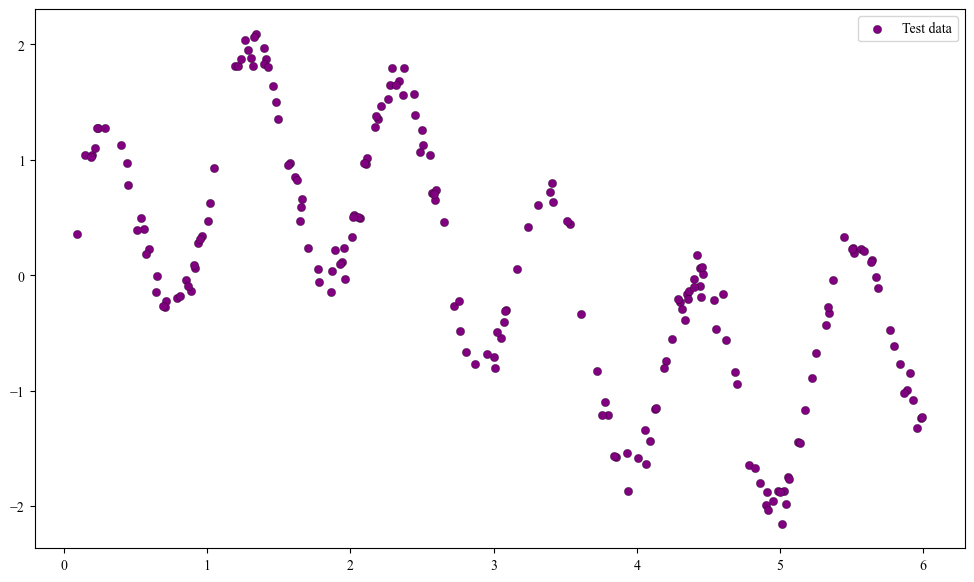

In [106]:
from sklearn.ensemble import AdaBoostRegressor 

rng = np.random.RandomState(1210)
X = np.linspace(0,6,1000)[:,np.newaxis]
y = np.sin(X).ravel() + np.sin(6*X).ravel() + rng.normal(0,0.1, X.shape[0])

X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=1210, test_size=0.2)

plt.figure(figsize=(12,7), dpi=100)
# plt.scatter(X_train, y_train, color='orange',edgecolors='black',linewidths=0.2,label='Train data')
plt.scatter(X_test, y_test, color='purple',edgecolors='black',linewidths=0.2,label='Test data')
plt.legend()
plt.show()

In [120]:
tb = pd.concat([pd.DataFrame(X_train),pd.DataFrame(y_train)],axis=1)
tb.columns = ['X','y']
tb.sort_values('X',inplace=True)

In [124]:
rfg = RandomForestRegressor(max_depth=4)
dtr = DecisionTreeRegressor(max_depth=4) # 回归树
abr = AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=4),
                       n_estimators=300, random_state=1210
                       ) # adaboost回归
rfg.fit(X_train, y_train)
dtr.fit(X_train, y_train)
abr.fit(X_train, y_train)

rfg_pridect = rfg.predict(tb[['X']].to_numpy())
dtr_predict = dtr.predict(tb[['X']].to_numpy())
abr_predict = abr.predict(tb[['X']].to_numpy())

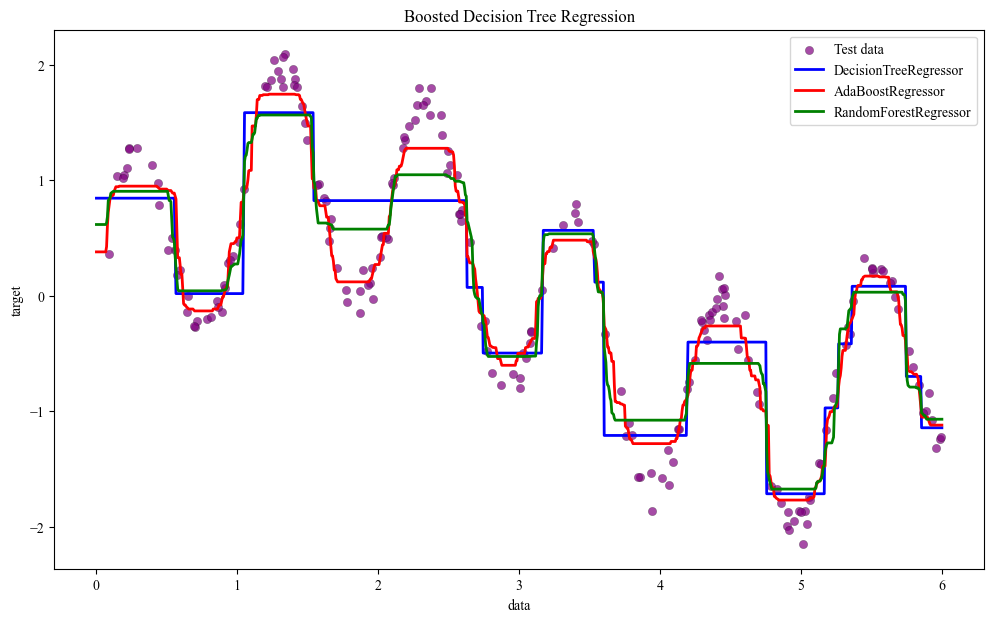

In [128]:
from sklearn.ensemble import AdaBoostRegressor 

rng = np.random.RandomState(1210)
X = np.linspace(0,6,1000)[:,np.newaxis]
y = np.sin(X).ravel() + np.sin(6*X).ravel() + rng.normal(0,0.1, X.shape[0])

X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=1210, test_size=0.2)

plt.figure(figsize=(12,7), dpi=100)
# plt.scatter(X_train, y_train, color='orange',edgecolors='black',linewidths=0.2,label='Train data')
plt.scatter(X_test, y_test, color='purple',alpha=.7,
            edgecolors='black',linewidths=0.2,label='Test data')

plt.plot(tb['X'], dtr_predict, color='blue', label='DecisionTreeRegressor',linewidth=2)
plt.plot(tb['X'], abr_predict, color='red', label='AdaBoostRegressor',linewidth=2)
plt.plot(tb['X'], rfg_pridect, color='green', label='RandomForestRegressor',linewidth=2)
plt.legend()
plt.xlabel('data')
plt.ylabel('target')
plt.title('Boosted Decision Tree Regression')
plt.show()

lass AdaBoostRegressor(sklearn.utils._metadata_requests._RoutingNotSupportedMixin, sklearn.base.RegressorMixin, BaseWeightBoosting)
 |  AdaBoostRegressor(estimator=None, *, n_estimators=50, learning_rate=1.0, loss='linear', random_state=None)
 
- estimator=None: 使用的基学习器,默认使用的回归树,且树都最大深度是3
- n_estimators=50: 基学习器的数量:
-  learning_rate=1.0 学习器的增长速度,学习率很大时,每棵树增长的更快,所需要的基学习器的数量也就越少,
- loss='linear', 回归器专属,在每个提升迭代之后更新权重是,使用速度损失函数,{linear, square, exponential}